In [1]:
import platform
import matplotlib as mpl
from matplotlib import font_manager, rc
import numpy as np
system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin":
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")

mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

df=pd.read_csv("titanic_train.csv",encoding='utf8')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
count_df = df.groupby(['Sex', 'Survived']).size().unstack()
count_df



Survived,0,1
Sex,,
female,81,233
male,468,109


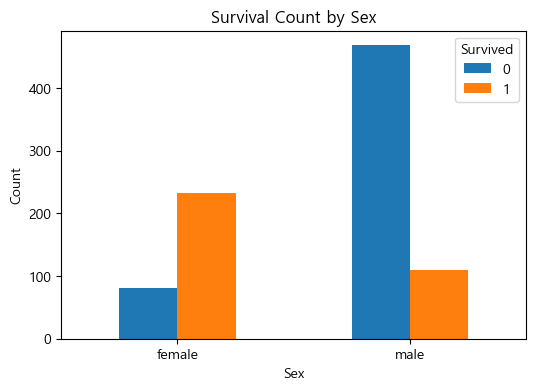

In [4]:
import matplotlib.pyplot as plt

count_df.plot(kind='bar', figsize=(6,4))

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()


In [5]:
p_class=df.groupby(['Pclass', 'Survived']).size().unstack()
p_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


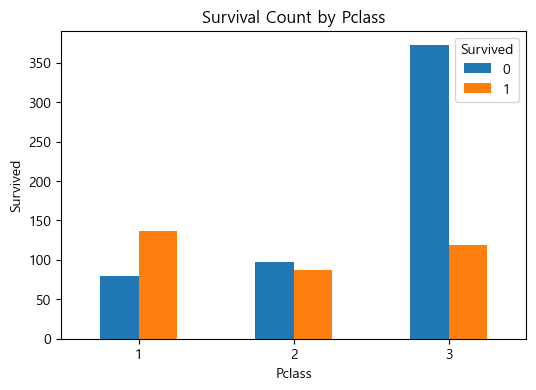

In [6]:

p_class.plot(kind='bar', figsize=(6,4))
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Survival Count by Pclass')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

## 실습 시작


passengerid: 탑승자 데이터 일련번호
survived:생존여부 ,0=사망,1=생존
Pclass:티켓의 선실등급,1=일등석,2=이등석,3=삼등석

name:탑승자 이름
sex:탑승자 성별
Age:탑승자 나이
SibSp: 같이 탑승한 형제 자매 또는 배우자 인원수
Parch:같이 탑승한 부모님 또는 어린이 인원수
ticket:티켓 번호
Fare:요금
cabin:선실번호
embarked:중간 정착 항구

C=Cherbourg,Q=Queenstown,S=Southampton

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프를 노트북 안에 표시
%matplotlib inline

# 타이타닉 학습 데이터 CSV 파일 읽기
titanic_df=pd.read_csv('./titanic_train.csv')

# 데이터 상위 3행 확인
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
# 데이터 구조 및 결측치 정보 확인
print("\n ### train데이터 정보 ###")
print(titanic_df.info())


 ### train데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Null컬럼들의 대한 처리

In [9]:
# Age 컬럼의 결측치를 평균값으로 채우기
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
# Cabin 컬럼의 결측치를 'N'으로 채우기
titanic_df['Cabin'].fillna('N',inplace=True)
# Embarked 컬럼의 결측치를 'N'으로 채우기
titanic_df['Embarked'].fillna('N',inplace=True)
# 전체 데이터에서 Null 값이 남아 있는지 확인
print("데이터 세트 Null값 갯수",titanic_df.isnull().sum().sum())

데이터 세트 Null값 갯수 0


C:\Users\User\AppData\Local\Temp\ipykernel_22028\3583485104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22028\3583485104.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [10]:
# 성별 값 분포 확인 (남자 / 여자 몇 명인지)
print("Sex 값 분포: \n",titanic_df['Sex'].value_counts())
# Cabin 값 분포 확인 (객실 번호 분포)
print("\n Cabin값 분포: \n",titanic_df['Cabin'].value_counts())
# Embarked 값 분포 확인 (탑승 항구)
print("\n Embarked 값 분포:\n",titanic_df['Embarked'].value_counts())

Sex 값 분포: 
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin값 분포: 
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [11]:
# Cabin 값에서 앞 글자 1개만 사용하도록 단순화
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
# Cabin 컬럼 변경 확인
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [12]:
# 성별 + 생존 여부별 인원 수 집계
titanic_df.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

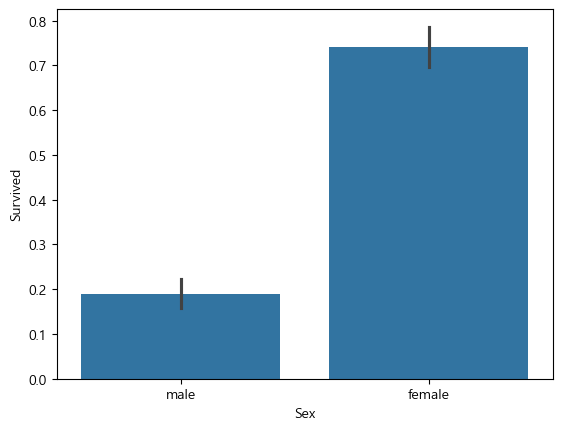

In [13]:
# 성별에 따른 생존율 시각화
sns.barplot(x='Sex',y='Survived',data=titanic_df)
plt.show()

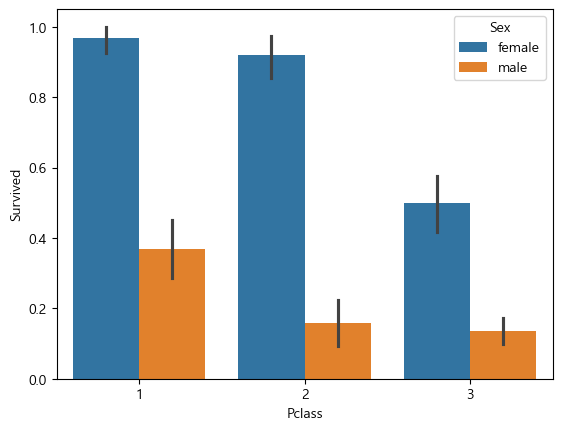

In [14]:
# 객실 등급(Pclass) + 성별에 따른 생존율 시각화
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)
plt.show()

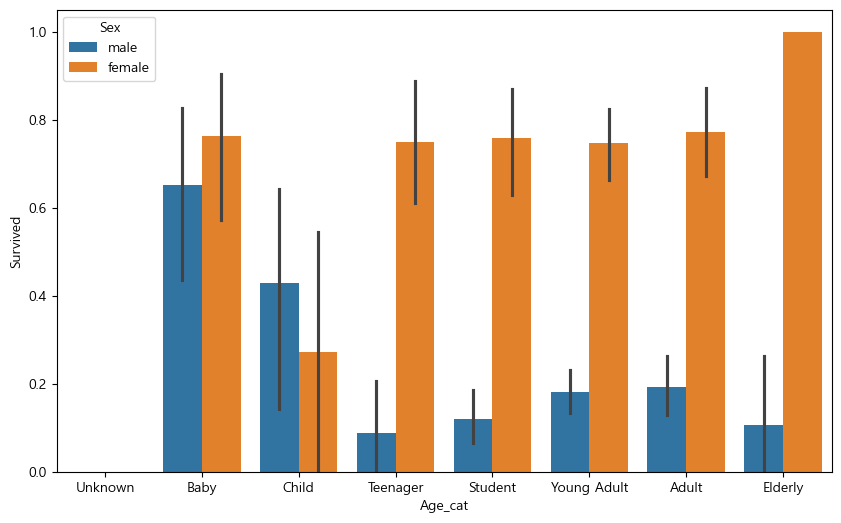

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 나이에 따라 연령대 카테고리를 반환하는 함수
def get_category(age):
    if pd.isna(age):            # 나이가 없는 경우
        return 'Unknown'
    elif age <= 5:               # 0~5세
        return 'Baby'
    elif age <= 12:               # 6~12세
        return 'Child'
    elif age <= 18:               # 13~18세
        return 'Teenager'
    elif age <= 25:               # 19~25세
        return 'Student'
    elif age <= 35:               # 26~35세
        return 'Young Adult'
    elif age <= 60:              # 36~60세
        return 'Adult'
    else:                        # 60세 초과
        return 'Elderly'

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# x축에 표시할 연령대 순서
group_names = [
    'Unknown',
    'Baby',
    'Child',
    'Teenager',
    'Student',
    'Young Adult',
    'Adult',
    'Elderly'
]

# Age 컬럼을 연령대 카테고리로 변환하여 새 컬럼 생성
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

# 연령대별 + 성별 생존률 막대그래프 생성
sns.barplot(
    x='Age_cat',
    y='Survived',
    hue='Sex',
    data=titanic_df,
    order=group_names
)
# 그래프 출력
plt.show()

# 분석용으로 만든 임시 컬럼 삭제
titanic_df.drop('Age_cat', axis=1, inplace=True)


In [16]:
from sklearn import preprocessing


# 문자 컬럼을 숫자로 변환하는 함수
def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        # 인코더 생성
        le=preprocessing.LabelEncoder()
        # 문자 값 학습
        le=le.fit(dataDF[feature])
         # 숫자로 변환
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 결측치(NaN) 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)# 나이 평균값
    df['Cabin'].fillna('N',inplace=True)   # 객실 없음
    df['Embarked'].fillna('N',inplace=True)  # 항구 없음
    df['Fare'].fillna(0,inplace=True)  # 요금 없음

    return df

# 불필요한 컬럼 삭제 함수
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 문자 컬럼 정리 및 인코딩 함수
def format_features(df):
    # Cabin 앞 글자만 사용
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df


# 전체 전처리를 한 번에 수행하는 함수
def transform_features(df):
    df=fillna(df)   # 1. 결측치 처리
    df=drop_features(df)   # 2. 불필요한 컬럼 삭제
    df=format_features(df)   # 3. 문자 → 숫자 변환
    return df

#############################################################

grid_dclf.best_params_     # 최고 점수를 낸 파라미터 조합

grid_dclf.best_score_      # 교차검증 평균 최고 점수

grid_dclf.best_estimator_  # 그 파라미터로 전체 학습 데이터를 다시 학습한 모델

grid_dclf.cv_results_      # 모든 조합 + fold별 점수 + 평균/표준편차 등 상세 정보

#############################################################

In [18]:
pd.isna(23)

False

In [ ]:
# 타이타닉 학습 데이터를 CSV 파일에서 불러오기
titanic_df=pd.read_csv("./titanic_train.csv")
# 생존 여부(Survived)를 정답(y)으로 분리
y_titanic_df=titanic_df['Survived']
# 생존 여부를 제외한 나머지를 입력 데이터(X)로 분리
X_titanic_df=titanic_df.drop('Survived',axis=1)

# 앞에 transform_features함수 전처리하고 문자를 숫자로 변환해주는 함수를 따로 앞에 만듦
X_titanic_df=transform_features(X_titanic_df)

C:\Users\User\AppData\Local\Temp\ipykernel_22028\2450269106.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)# 나이 평균값
C:\Users\User\AppData\Local\Temp\ipykernel_22028\2450269106.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df # 문제 데이터 (입력값)
                                               ,y_titanic_df, # 정답 데이터
                                               test_size=0.2, # 전체의 20%는 시험용
                                               random_state=11) # 항상 같은 방식으로 섞기

KeyboardInterrupt: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

# ===== 결정트리 =====
dt_clf.fit(X_train,y_train) # 학습
dt_pred=dt_clf.predict(X_test) # 예측
print("DecisionTreeClassifier 정확도 :{0:.4f}".format(accuracy_score(y_test,dt_pred)))

# ===== 랜덤포레스트 =====
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print("RandomForestClassifier 정확도:{0:.4f}".format(accuracy_score(y_test,rf_pred)))

# ===== 로지스틱 회귀 =====
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도 :{0:.4f}'.format(accuracy_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도 :0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도 :0.8492


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
     # 데이터를 folds 개로 나누는 KFold 객체 생성
    kfold=KFold(n_splits=folds)
    # 각 폴드의 정확도를 저장할 리스트
    scores=[]

    # KFold로 나눈 인덱스를 하나씩 사용
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        
        # 피처 데이터 
        
        X_train,X_test=X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        
        # 레이블데이터
        y_train,y_test=y_titanic_df.values[train_index],y_titanic_df.values[test_index]

        # 모델 학습 (공부)
        clf.fit(X_train,y_train)

        # 검증 데이터로 예측 수행
        predictions=clf.predict(X_test)

        # 실제 값(y_test)과 예측 값(predictions)을 비교하여 정확도 계산
        accuracy=accuracy_score(y_test,predictions)

        # 이번 교차검증의 정확도를 리스트에 저장
        scores.append(accuracy)

        # 현재 몇 번째 교차검증인지와 정확도 출력
        print("교차검증 {0} 정확도 :{1:.4f}".format(iter_count,accuracy))

    # 모든 교차검증 정확도의 평균 계산
    mean_score=np.mean(scores)

    # 평균 정확도 출력
    print("평균 정확도: {0:.4f}".format(mean_score))
    
# 결정트리 모델(dt_clf)을 사용하여 5겹 교차검증 실행
exec_kfold(dt_clf,folds=5)

[[ 3.          1.         36.         ...  0.          7.
   3.        ]
 [ 3.          0.         29.69911765 ... 69.55        7.
   3.        ]
 [ 2.          1.         29.69911765 ... 15.05        7.
   0.        ]
 ...
 [ 3.          0.         29.69911765 ... 23.45        7.
   3.        ]
 [ 1.          1.         26.         ... 30.          2.
   0.        ]
 [ 3.          1.         32.         ...  7.75        7.
   2.        ]]
교차검증 0 정확도 :0.7542
[[ 3.          1.         22.         ...  7.25        7.
   3.        ]
 [ 1.          0.         38.         ... 71.2833      2.
   0.        ]
 [ 3.          0.         26.         ...  7.925       7.
   3.        ]
 ...
 [ 3.          0.         29.69911765 ... 23.45        7.
   3.        ]
 [ 1.          1.         26.         ... 30.          2.
   0.        ]
 [ 3.          1.         32.         ...  7.75        7.
   2.        ]]
교차검증 1 정확도 :0.7809
[[ 3.          1.         22.         ...  7.25        7.
   3.        ]
 

In [ ]:
from sklearn.model_selection import GridSearchCV

# 시험해볼 하이퍼파라미터(공부 방법) 목록
parameters={'max_depth':[2,3,5,10], # 트리 깊이
            'min_samples_split':[2,3,5], # 노드 분할 최소 데이터 수
            'min_samples_leaf':[1,5,8]}  # 리프 노드 최소 데이터 수

# GridSearchCV 객체 생성
# → 여러 설정을 자동으로 시험해주는 감독관
grid_dclf=GridSearchCV(dt_clf,  # 사용할 결정트리 모델
                       param_grid=parameters, # 시험할 설정들
                       scoring='accuracy',# 평가 기준: 정확도
                       cv=5) # 5겹 교차검증

# GridSearch 실행 (연습문제로 시험)
grid_dclf.fit(X_train,y_train)

# 가장 성능이 좋았던 하이퍼파라미터 출력
print("GridSearchcv 최적 하이퍼 파라미터:",grid_dclf.best_params_)
# 최고 평균 정확도 출력
print("GridSearchCV 최고 정확도: {0:.4f}".format(grid_dclf.best_score_))

# 가장 성능이 좋은 모델 가져오기
best_dclf=grid_dclf.best_estimator_

# 테스트 데이터로 예측 수행
dpredictions=best_dclf.predict(X_test)
# 테스트 데이터 정확도 계산
accuracy=accuracy_score(y_test,dpredictions)

# 테스트 세트 최종 정확도 출력
print("테스트 세트에서의 DecisionTreeClassifier 정확도 {0:.4f}".format(accuracy))

GridSearchcv 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 0.8715
